In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [36]:
df=pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Exploratory Data Analysis (EDA)

In [37]:
df.shape

(101, 18)

In [38]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

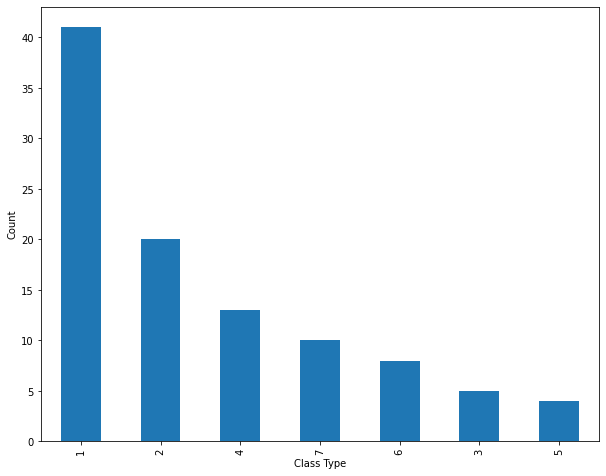

In [39]:
# Class wise animal counts.
# We can see, mostly animals belong to the class 1 which is Mammal.
plt.figure(figsize=(10,8));
df.type.value_counts().plot(kind="bar");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

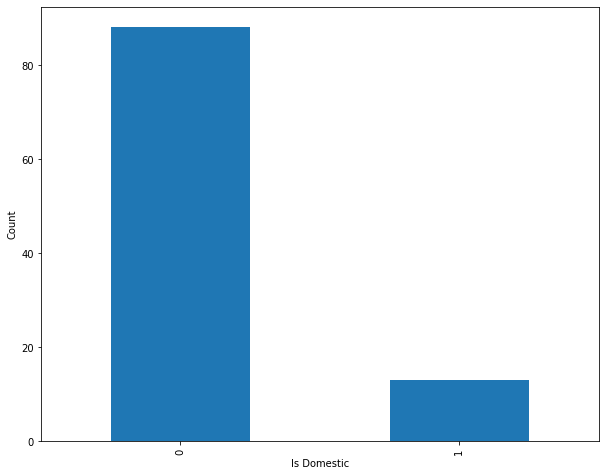

In [40]:
plt.figure(figsize=(10,8));
df.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

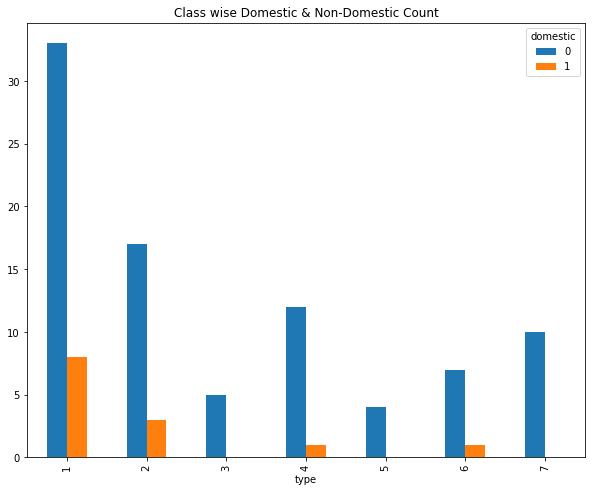

In [41]:
pd.crosstab(df.type, df.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

We can see mammals class has most number of domestic animals, which is a kind of true if you will see around  you. Mostly domestic animals are mammals like dogs, cats, cows, pigs.


In [42]:
# Lets see how many animals provides us milk
df.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

So there are 41 animals in the list which provides us milk. Lets see to which category they belongs

In [43]:
pd.crosstab(df.type, df.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


So we can observer here only mammals provides milk, which is really a scientific true.

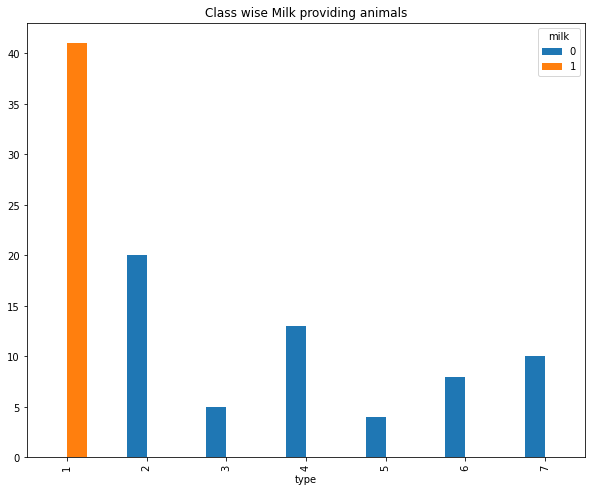

In [44]:
pd.crosstab(df.type, df.milk).plot(kind="bar", title="Class wise Milk providing animals", figsize=(10, 8));

We can see mammal bar is orange (milk = 1), this shows all the mammals in our list provides milk.

In [45]:
Y=df['type'].values
X=df.drop(['type','animal name'],axis=1).values


In [46]:
kfold=KFold(n_splits=10)

In [47]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(X,Y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


Tuned hyperparameter k: {'n_neighbors': 1}
Best score: 0.9702911467617351


After running grid search method best n_neigbors value is 1 and accuracy is 097029

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) accuracy is: ',knn.score(x_test,y_test))


With KNN (K=1) accuracy is:  0.967741935483871


# So we can see we have an accuracy of 96% which is very good

In [51]:
prediction

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 7, 3, 2, 1,
       6, 6, 4, 7, 6, 1, 4, 1, 1])

Best accuracy is 0.967741935483871 with K = 1


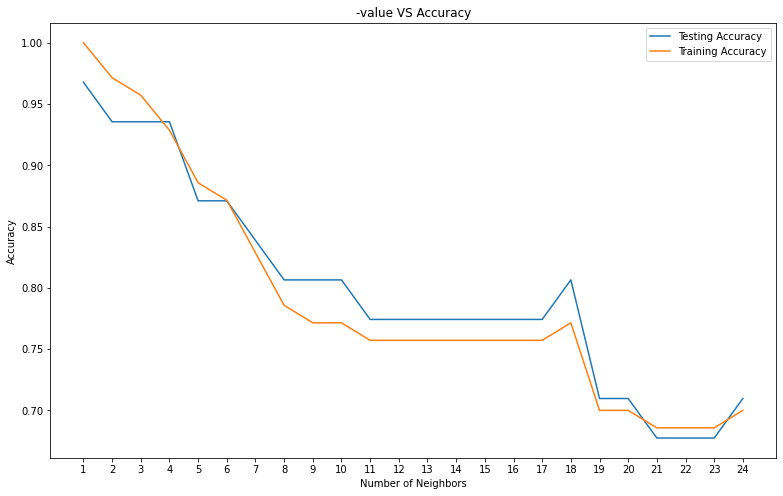

In [52]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [54]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print(cv.best_params_)

Accuracy: 0.9523809523809523


{'SVM__C': 10, 'SVM__gamma': 0.01}

In [63]:
# Declare the model
svm = SVC(gamma=0.01,C=10, random_state=0)

# Train the model
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

#Get Accuracy Scor
score = accuracy_score(y_pred_svm,y_test)
scores.append(score)

In [64]:
score_svm=cross_val_score(svm, X,Y, cv=10)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))
cv_score = score_svm.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy: 0.95 (+/- 0.10)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [60]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Declare and train the model
clf = DecisionTreeClassifier(random_state = 0,criterion='gini')
clf.fit(x_train, y_train)

y_pred_DecisionTreeClassifier = clf.predict(x_test)

scores = []
score = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
a=scores.append(score)
score_tree=cross_val_score(clf, X,Y, cv=10)
score_tree


Decision Tree Accuracy: 0.96 (+/- 0.13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [61]:
cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy: 0.96 (+/- 0.13)



In order to truly apply animal classification, I used a few machine learning models to do classifications and then perform a battle to see which model has the best accuracy score. Here used Decision tree,  K-Nearest Neighbors, Support Vector Machine.
conclusion:- As i got K-Nearest Neighbors Accuracy:0.14 accuracy score and 0.89 of cross validation.
wins with a 1.0 accuracy score and 0.96 of cross validation.